In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import os

In [4]:
import matplotlib.dates as mdates

In [2]:
%matplotlib inline

## Functions:

In [35]:
def ecdf_copypaste(data, ob_label, xlabel):
    import numpy as np
    sorted=np.sort(data.ix[:,0])
    yvals=np.arange(len(sorted))/float(len(sorted))
    fig = plt.plot(sorted, yvals, label=ob_label)
    plt.xlabel(xlabel)
    plt.ylabel('Cumulative Probability')
    #plt.legend()
    plt.legend(loc='best')

In [149]:
def sammlerplot_ecdf(data, title, filename=None, mnq=None, mq=None, mhq=None, cap=1):
    import numpy as np
    data_series = data.ix[:,0]
    sorted=np.sort(data_series)
    yvals=np.arange(len(sorted))/float(len(sorted))
    fig = plt.plot(sorted, yvals, label='Abfluss')
    plt.title(title)
    plt.axvline(sorted.mean(), color='black', linestyle='dotted')
    plt.annotate(r'Mittel Zeitraum: '+'{:.2f}'.format(sorted.mean()), xy=[sorted.mean()+(max(sorted)/100),0.125], color='black')
    plt.axvline(mnq, color='red')
    plt.annotate(r'MNQ: '+str(mnq), xy=[mnq+(max(data_series)/100),0.05], color='red')
    plt.axvline(mq, color='green')
    plt.annotate(r'MQ: '+str(mq), xy=[mq+(max(data_series)/100),0.2], color='green')
    plt.axvline(mhq, color='orange')
    plt.annotate(r'MHQ: '+str(mhq), xy=[mhq+(max(data_series)/100),0.2], color='orange')
    #plt.annotate(r'MHQ: 178', xy=(140, 0.5), xytext=(100, 0.4), arrowprops=dict(facecolor='black', shrink=0.05), color='orange')
    plt.xlabel('Abfluss $[m^3/s]$')
    plt.ylabel('Cumulative Probability')
    plt.xlim(0,data_series.quantile(q=cap))
    if filename == None:
        return '(Plot not saved to file)'
    else:
        plt.savefig(filename, dpi=300)
    

In [150]:
def sammlerplot_zeitreihe(data, title, filename=None):
    data_series = data.ix[:,0]
    data_series.plot()
    #xdate = mdates.date2num(data_series.index[0])
    plt.title(title)
    plt.ylabel('Abfluss $[m^3/s]$')
    plt.axhline(data_series.mean(), color='black', linestyle='dotted')
    #plt.annotate(r'Mittel Zeitraum: '+'{:.2f}'.format(data_series.mean()), xy=[xdate,0], color='black')
    
    #plt.axhline(4.09, color='red')
    #plt.annotate(r'MNQ: 4.09', xy=[xdate,60], color='red')
    #plt.axhline(13, color='green')
    #plt.annotate(r'MQ: 13', xy=[xdate,100], color='green')
    #plt.annotate(r'MHQ: 178', xy=(xdate, 140), xytext=(xdate, 120),
    #           arrowprops=dict(facecolor='black', shrink=0.05), color='orange')
    #plt.legend(loc='best')
    if filename == None:
        return '(Plot not saved to file)'
    else:
        plt.savefig(filename, dpi=300)

## Data import:

In [38]:
fritz = pd.read_excel('Fritz am Sand 14-16.xlsx', index_col=0, header=0)
kirchberg = pd.read_excel('Kirchberg Mertseebach 14-16.xlsx', index_col=0, header=0)
ruhstorf = pd.read_excel('Ruhstorf Rott 14-16.xlsx', index_col=0, header=0)
stein = pd.read_excel('Stein bei Altenmarkt 14-16.xlsx', index_col=0, header=0)

# Fritz:

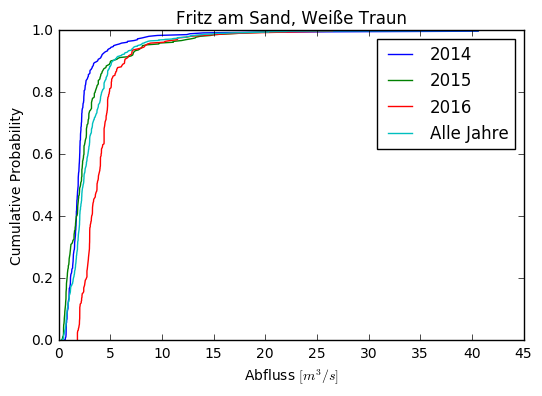

In [46]:
ecdf_copypaste(fritz['2014'], '2014', 'Abfluss $[m^3/s]$')
ecdf_copypaste(fritz['2015'], '2015', 'Abfluss $[m^3/s]$')
ecdf_copypaste(fritz['2016'], '2016', 'Abfluss $[m^3/s]$')
ecdf_copypaste(fritz, 'Alle Jahre', 'Abfluss $[m^3/s]$')
plt.title('Fritz am Sand, Weiße Traun')
plt.savefig('Vergleich_Jahre_Fritz.png', dpi=300)

'(Plot not saved to file)'

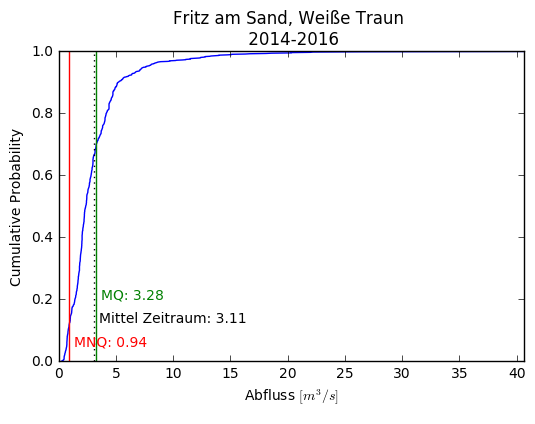

In [152]:
sammlerplot_ecdf(fritz, 'Fritz am Sand, Weiße Traun \n 2014-2016', mnq=0.94, mq=3.28, mhq=52.0)

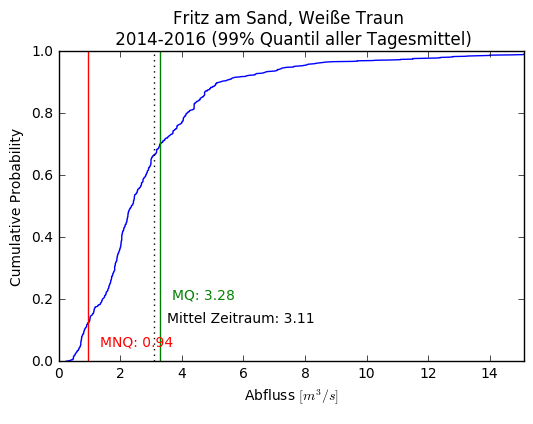

In [153]:
sammlerplot_ecdf(fritz, 'Fritz am Sand, Weiße Traun \n 2014-2016 (99% Quantil aller Tagesmittel)', 
                 filename='eCDF_2014-2016_Fritz_capQ.png', mnq=0.94, mq=3.28, mhq=52.0, cap=.99)

'(Plot not saved to file)'

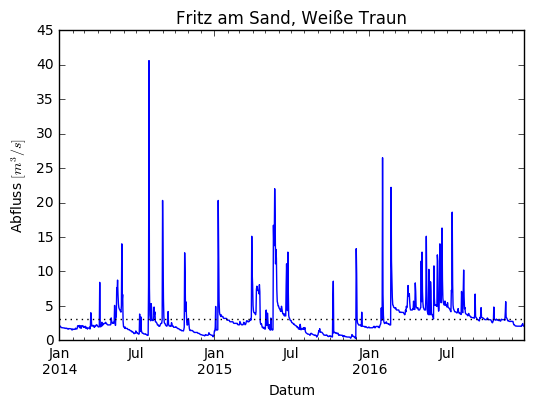

In [151]:
sammlerplot_zeitreihe(fritz, 'Fritz am Sand, Weiße Traun')

# Kirchberg:

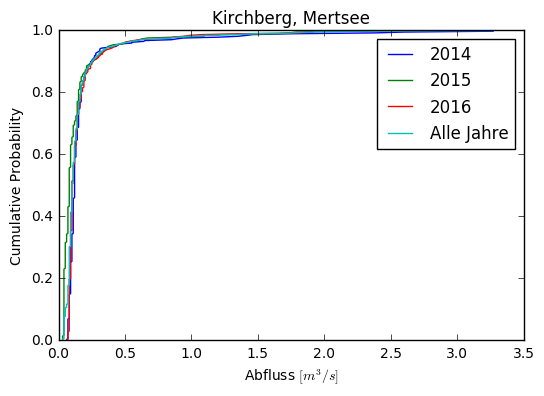

In [45]:
ecdf_copypaste(kirchberg['2014'], '2014', 'Abfluss $[m^3/s]$')
ecdf_copypaste(kirchberg['2015'], '2015', 'Abfluss $[m^3/s]$')
ecdf_copypaste(kirchberg['2016'], '2016', 'Abfluss $[m^3/s]$')
ecdf_copypaste(kirchberg, 'Alle Jahre', 'Abfluss $[m^3/s]$')
plt.title('Kirchberg, Mertsee')
plt.savefig('Vergleich_Jahre_Kirchberg.png', dpi=300)

'(Plot not saved to file)'

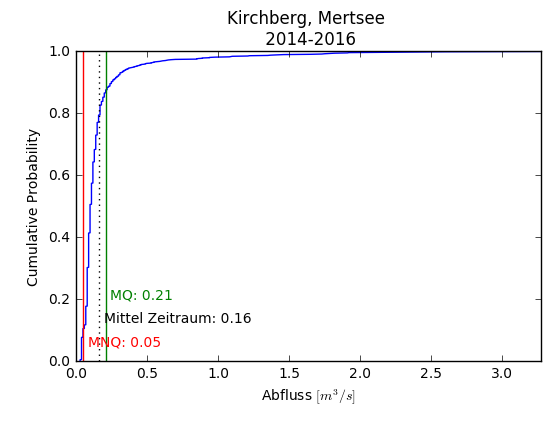

In [154]:
sammlerplot_ecdf(kirchberg, 'Kirchberg, Mertsee \n 2014-2016', mnq=0.05, mq=0.21, mhq=9.14)

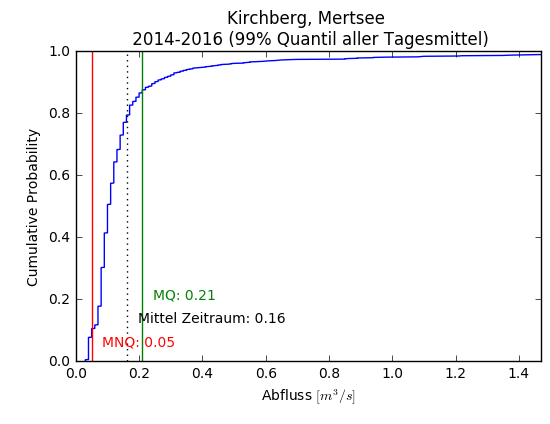

In [145]:
sammlerplot_ecdf(kirchberg, 'Kirchberg, Mertsee \n 2014-2016 (99% Quantil aller Tagesmittel)', 
                 filename='eCDF_2014-2016_Kirchberg_capQ.png', mnq=0.05, mq=0.21, mhq=9.14, cap=0.99)

'(Plot not saved to file)'

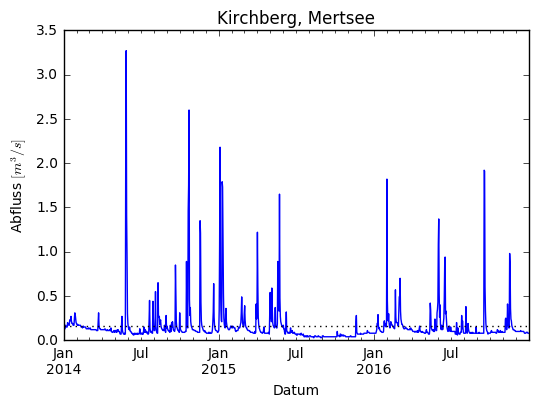

In [157]:
sammlerplot_zeitreihe(kirchberg, 'Kirchberg, Mertsee')

# Ruhstorf:

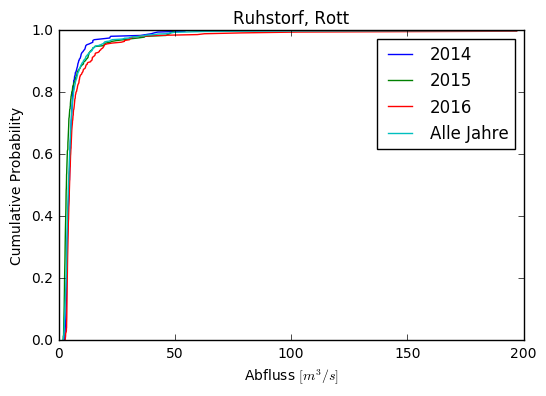

In [44]:
ecdf_copypaste(ruhstorf['2014'], '2014', 'Abfluss $[m^3/s]$')
ecdf_copypaste(ruhstorf['2015'], '2015', 'Abfluss $[m^3/s]$')
ecdf_copypaste(ruhstorf['2016'], '2016', 'Abfluss $[m^3/s]$')
ecdf_copypaste(ruhstorf, 'Alle Jahre', 'Abfluss $[m^3/s]$')
plt.title('Ruhstorf, Rott')
plt.savefig('Vergleich_Jahre_Ruhstorf.png', dpi=300)

'(Plot not saved to file)'

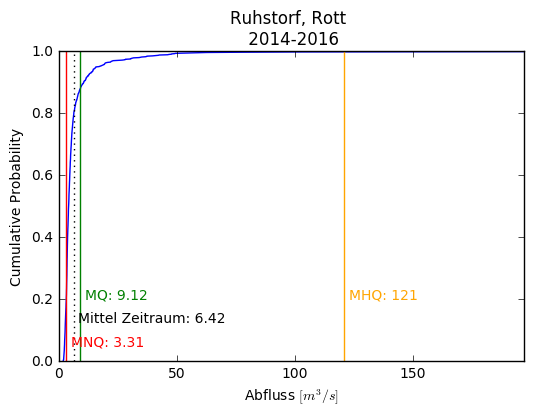

In [155]:
sammlerplot_ecdf(ruhstorf, 'Ruhstorf, Rott \n 2014-2016', mnq=3.31, mq=9.12, mhq=121)

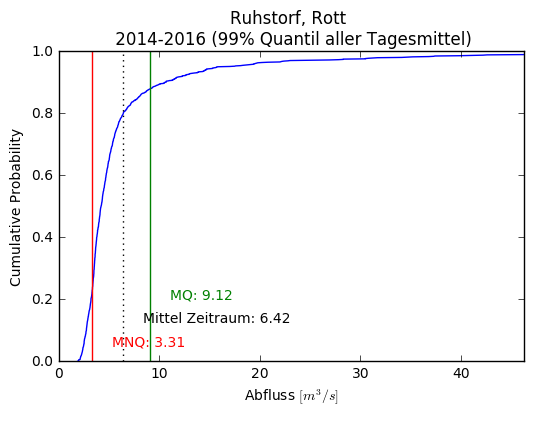

In [146]:
sammlerplot_ecdf(ruhstorf, 'Ruhstorf, Rott \n 2014-2016 (99% Quantil aller Tagesmittel)', 
                 filename='eCDF_2014-2016_Ruhstorf_capQ.png', mnq=3.31, mq=9.12, mhq=121, cap=0.99)

'(Plot not saved to file)'

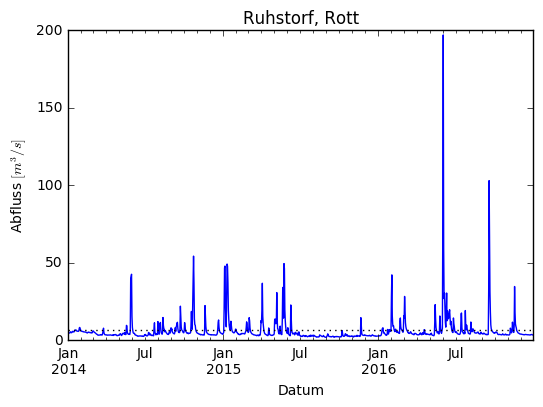

In [158]:
sammlerplot_zeitreihe(ruhstorf, 'Ruhstorf, Rott')

# Stein:

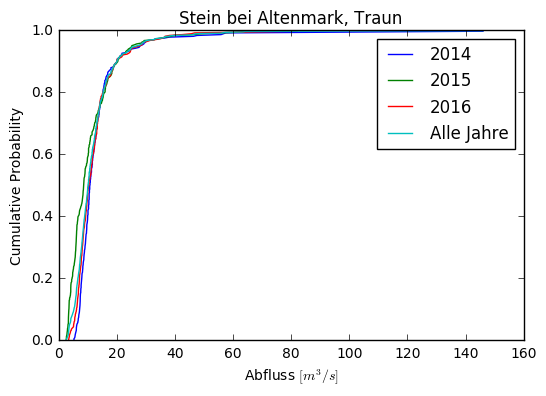

In [47]:
ecdf_copypaste(stein['2014'], '2014', 'Abfluss $[m^3/s]$')
ecdf_copypaste(stein['2015'], '2015', 'Abfluss $[m^3/s]$')
ecdf_copypaste(stein['2016'], '2016', 'Abfluss $[m^3/s]$')
ecdf_copypaste(stein, 'Alle Jahre', 'Abfluss $[m^3/s]$')
plt.title('Stein bei Altenmark, Traun')
plt.savefig('Vergleich_Jahre_Stein.png', dpi=300)

'(Plot not saved to file)'

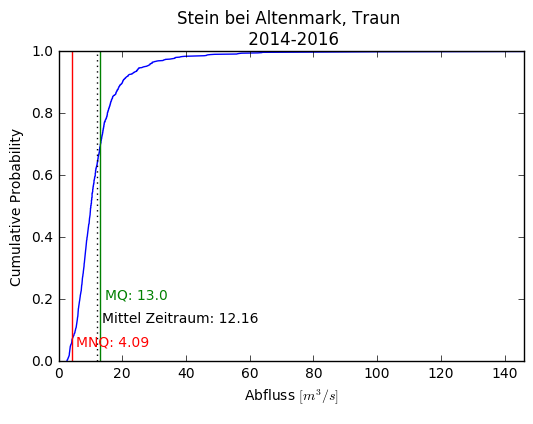

In [156]:
sammlerplot_ecdf(stein, 'Stein bei Altenmark, Traun \n 2014-2016', mnq=4.09, mq=13.0, mhq=178)

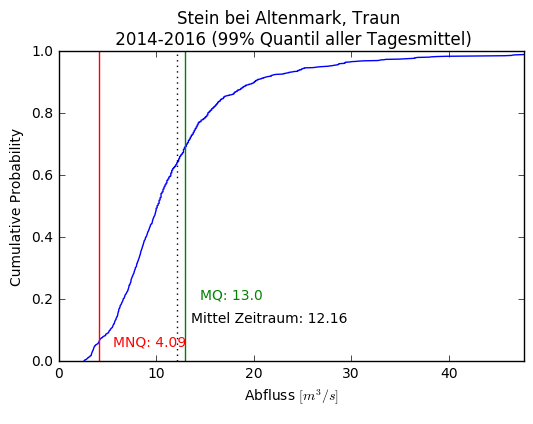

In [148]:
sammlerplot_ecdf(stein, 'Stein bei Altenmark, Traun \n 2014-2016 (99% Quantil aller Tagesmittel)', 
                 filename='eCDF_2014-2016_Stein_capQ.png', mnq=4.09, mq=13.0, mhq=178, cap=.99)

'(Plot not saved to file)'

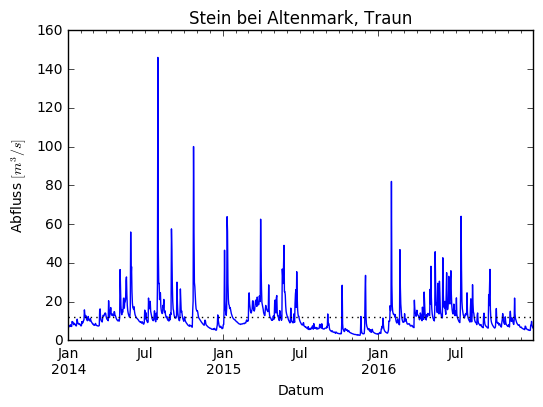

In [159]:
sammlerplot_zeitreihe(stein, 'Stein bei Altenmark, Traun')